# Time Series Decomposition

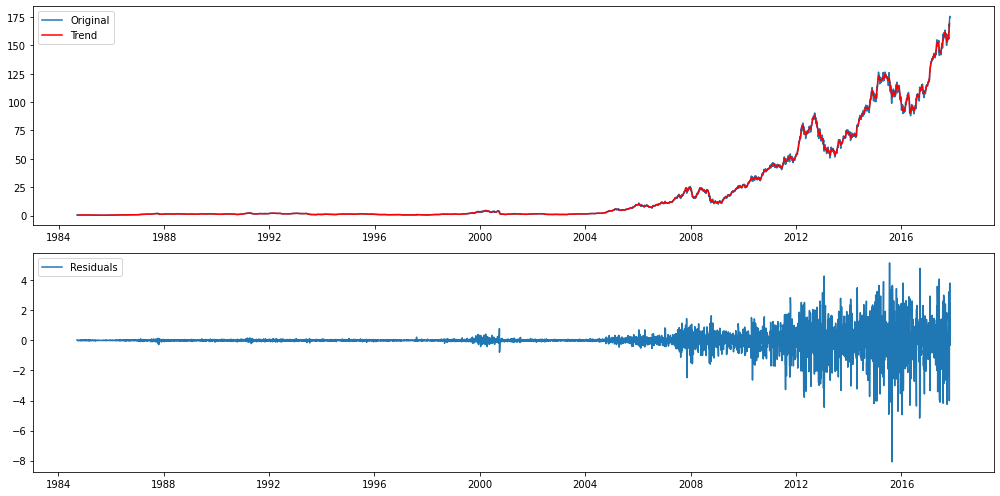

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data
aapl_df = pd.read_csv('../data/aapl.us.txt', delimiter=',')

# convert the date column to datetime and set it as the index
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df.set_index('Date', inplace=True)

# rolling mean for trend
trend = aapl_df['Close'].rolling(window=12, center=True).mean()

# residuals as the original data minus the trend
residuals = aapl_df['Close'] - trend

# plot trend and residuals
plt.figure(figsize=(14, 7))

plt.subplot(211)
plt.plot(aapl_df['Close'], label='Original')
plt.plot(trend, color='red', label='Trend')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


# Moving Average Convergence Divergence (MACD)

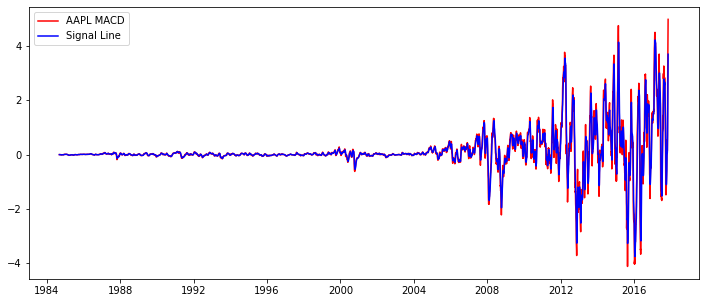

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
aapl_df = pd.read_csv('../data/aapl.us.txt', delimiter=',')

# convert the date column to datetime and set it as the index
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df.set_index('Date', inplace=True)

# calc the ShortEMA
ShortEMA = aapl_df.Close.ewm(span=12, adjust=False).mean()

# calc the LongEMA
LongEMA = aapl_df.Close.ewm(span=26, adjust=False).mean()

# calc the MACD
MACD = ShortEMA - LongEMA

# Calculate the Signal Line
signal = MACD.ewm(span=9, adjust=False).mean()

# Plot the MACD and Signal Line
plt.figure(figsize=(12,5))
plt.plot(aapl_df.index, MACD, label='AAPL MACD', color='red')
plt.plot(aapl_df.index, signal, label='Signal Line', color='blue')
plt.legend(loc='upper left')
plt.show()

# create new columns for data
aapl_df['MACD'] = MACD
aapl_df['Signal Line'] = signal


# Volatility Modeling with EWMA

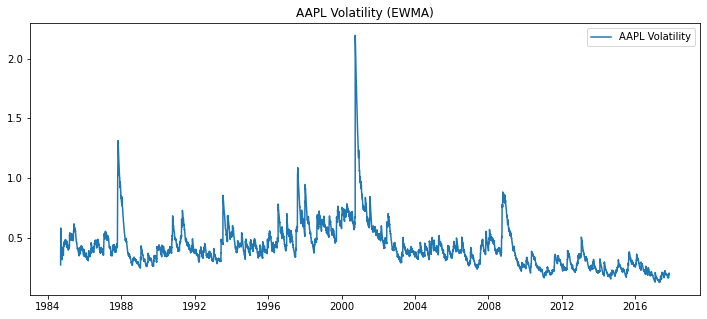

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
aapl_df = pd.read_csv('../data/aapl.us.txt', delimiter=',')

# convert the date column to datetime and set it as the index
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df.set_index('Date', inplace=True)

# calc log returns
aapl_df['Log_Return'] = np.log(aapl_df['Close'] / aapl_df['Close'].shift(1))

# calc EWMA of log returns, using 60 days
aapl_df['Volatility'] = aapl_df['Log_Return'].ewm(span=60).std() * (252 ** 0.5)

# plot
plt.figure(figsize=(12, 5))
plt.plot(aapl_df['Volatility'], label='AAPL Volatility')
plt.title('AAPL Volatility (EWMA)')
plt.legend(loc='best')
plt.show()


# Simple Moving Average Crossover Strategy

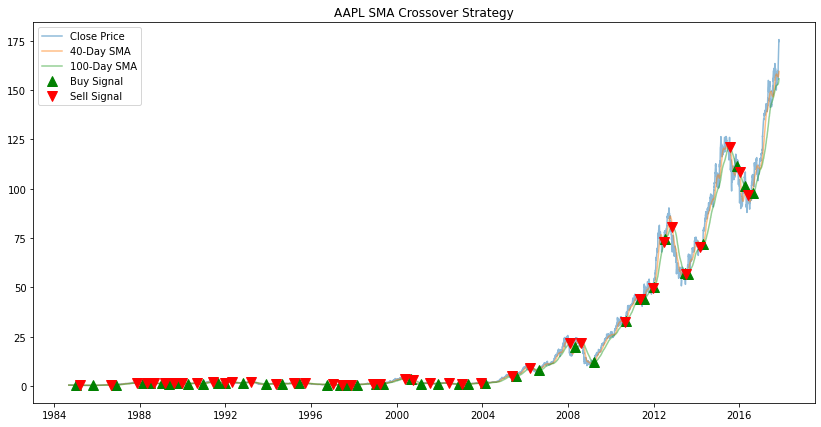

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load data
aapl_df = pd.read_csv('../data/aapl.us.txt', delimiter=',')

# convert the date column to datetime and set it as the index
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df.set_index('Date', inplace=True)

# the short and long windows for SMA calc
short_window = 40
long_window = 100

# calc short and long moving averages
aapl_df['Short_SMA'] = aapl_df['Close'].rolling(window=short_window, min_periods=1).mean()
aapl_df['Long_SMA'] = aapl_df['Close'].rolling(window=long_window, min_periods=1).mean()

# create signal when the short SMA crosses the long SMA
aapl_df['Signal'] = 0.0  
aapl_df.loc[short_window:, 'Signal'] = np.where(aapl_df['Short_SMA'][short_window:] > aapl_df['Long_SMA'][short_window:], 1.0, 0.0)   
aapl_df['Position'] = aapl_df['Signal'].diff()

# Plot the closing price along with the SMAs and the buy/sell signals
plt.figure(figsize=(14, 7))
plt.plot(aapl_df['Close'], label='Close Price', alpha=0.5)
plt.plot(aapl_df['Short_SMA'], label=f'{short_window}-Day SMA', alpha=0.5)
plt.plot(aapl_df['Long_SMA'], label=f'{long_window}-Day SMA', alpha=0.5)

# plot buy signals
plt.plot(aapl_df[aapl_df['Position'] == 1].index, 
         aapl_df['Short_SMA'][aapl_df['Position'] == 1], 
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

# plot sell signals
plt.plot(aapl_df[aapl_df['Position'] == -1].index, 
         aapl_df['Long_SMA'][aapl_df['Position'] == -1], 
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('AAPL SMA Crossover Strategy')
plt.legend(loc='best')
plt.show()


# Volume Analysis - Identifying Anomalous Trading Days

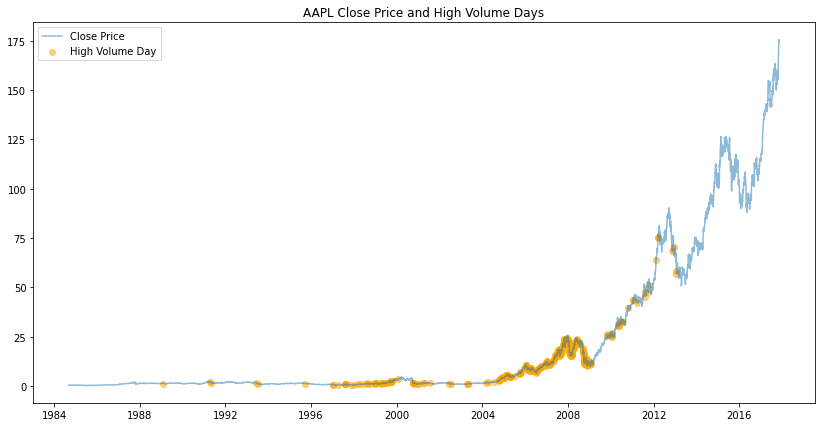

               Open     High       Low    Close      Volume  OpenInt  \
Date                                                                   
1989-01-27   1.2241   1.2562   1.16010   1.2037   593231984        0   
1991-04-15   1.9773   2.0643   1.92090   1.9926   474208280        0   
1991-05-01   1.5369   1.5687   1.50480   1.5124   521057510        0   
1993-06-09   1.4406   1.4598   1.40850   1.4162   328641141        0   
1993-07-16   0.9117   0.9490   0.84780   0.8809   591398510        0   
1995-09-15   1.1974   1.2768   1.13710   1.1487   337996000        0   
1997-01-06   0.5649   0.5865   0.55180   0.5724   525089934        0   
1997-01-08   0.5839   0.5877   0.55590   0.5649   306807942        0   
1997-03-27   0.5610   0.6159   0.55180   0.5969   317621468        0   
1997-08-06   0.8080   0.8886   0.80030   0.8427  1168653844        0   
1997-08-07   0.9209   0.9466   0.90780   0.9334  1047328117        0   
1997-08-08   0.8913   0.9078   0.83620   0.8591   505939805     

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the AAPL data
aapl_df = pd.read_csv('../data/aapl.us.txt', delimiter=',')

# Convert the 'Date' column to datetime and set it as the index
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df.set_index('Date', inplace=True)

# Calculate the average and standard deviation of the trading volume
average_volume = aapl_df['Volume'].mean()
std_volume = aapl_df['Volume'].std()

# Identify days where the trading volume is significantly higher than average
aapl_df['High_Volume'] = aapl_df['Volume'] > (average_volume + 2 * std_volume)

# Plot the closing price and highlight days with unusually high trading volume
plt.figure(figsize=(14, 7))
plt.plot(aapl_df['Close'], label='Close Price', alpha=0.5)

# Highlight days with high trading volume
plt.scatter(aapl_df[aapl_df['High_Volume']].index, 
            aapl_df['Close'][aapl_df['High_Volume']], 
            color='orange', label='High Volume Day', alpha=0.5)

plt.title('AAPL Close Price and High Volume Days')
plt.legend(loc='best')
plt.show()

# Optionally, output the dates with high trading volume
high_volume_days = aapl_df[aapl_df['High_Volume']]
print(high_volume_days)
